In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N = 20000

In [3]:
ip = np.random.randn(N) > 0.5 
ip = np.array(ip) 

In [4]:
s = 2 * ip - 1        

s = np.array(s) 

In [5]:
eb_no_db = np.arange(30) 

In [6]:
bit_error_rate_zero = np.zeros(len(eb_no_db))
bit_error_rate_mmse = np.zeros(len(eb_no_db))
bit_error_rate_zero_DFE = np.zeros(len(eb_no_db))
bit_error_rate_MMSE_DFE = np.zeros(len(eb_no_db))

In [7]:
def Zero_Forcing_SIC():

    for jj in range(len(eb_no_db)):
        
        nErr = 0
        
        received_bits_list = []
        
        
        
        for ii in range(N//2):
            
            h11 = (1 / np.sqrt(2)) * (np.random.rand() + 1j * np.random.rand())
            
            h12 = (1 / np.sqrt(2)) * (np.random.rand() + 1j * np.random.rand())
            
            h21 = (1 / np.sqrt(2)) * (np.random.rand() + 1j * np.random.rand())
            
            h22 = (1 / np.sqrt(2)) * (np.random.rand() + 1j * np.random.rand())
            
            n1 = (1 / np.sqrt(2)) * (np.random.rand() + 1j * np.random.rand())
            
            n2 = (1 / np.sqrt(2)) * (np.random.rand() + 1j * np.random.rand())
            
            x1 = s[2 * ii]
            
            x2 = s[2 * ii + 1]
            
            H = np.array([[h11, h12], [h21, h22]])
            
            n = np.array([[n1], [n2]])
            
            x = np.array([[x1], [x2]])
            
            Hx = np.matmul(H, x)
            
            y = (1 / np.sqrt(2)) * Hx + n * (10 ** (-eb_no_db[jj] / 20))
            
            H_conjugate = np.conjugate(H)
            
            H_Hermitian = np.transpose(H_conjugate)
            
            H_Hermitian_H = np.matmul(H_Hermitian, H)
            
            H_inverse = np.linalg.inv(H_Hermitian_H)
            
            W = np.matmul(H_inverse, H_Hermitian)
            
            x_hat = np.matmul(W, y)
            
            # upto zero forcing algorithm
            
            
            Px1 = np.abs(h11)**2 + np.abs(h21)**2
            
            Px2 = np.abs(h12)**2 + np.abs(h22)**2
            
            
            if Px1 > Px2:
                
                h1 = np.array([[h11],[h21]]) #x1 travel channel
                
                h2 = np.array([[h12],[h22]]) # remaining channel after substract
                
                x1_hat = x_hat[0,0] #after zero forcing x1 bit 
                
                hx = np.dot(h1,x1_hat)
                
                r = y - hx # substracting x1 bit with channel
                
                #finding remaining channel pseudo_inverse
                
                h2_conjugate = np.conjugate(h2)
            
                h2_Hermitian = np.transpose(h2_conjugate)
            
                h2_Hermitian_h2 = np.matmul(h2_Hermitian, h2)
            
                h2_inverse = np.linalg.inv(h2_Hermitian_h2)
            
                equalize_value = np.matmul(h2_inverse, h2_Hermitian)
                
                x2_hat = np.matmul(equalize_value,r)
                
                received_bits = np.real(x2_hat > 0)
                
                
                m = x1_hat > 0 
                
                n = received_bits[0, 0]   
                
                received_bits_list.append(m)
                
                received_bits_list.append(n)
                
            elif Px1 < Px2 :
                
                h2 = np.array([[h12],[h22]])
                
                h1 = np.array([[h11],[h21]])
                
                x2_hat = x_hat[1,0]
                
                hx = np.dot(h2,x2_hat)
                
                r = y - hx
                
                h1_conjugate = np.conjugate(h1)
            
                h1_Hermitian = np.transpose(h1_conjugate)
            
                h1_Hermitian_h1 = np.matmul(h1_Hermitian, h1)
            
                h1_inverse = np.linalg.inv(h1_Hermitian_h1)
            
                equalize_value = np.matmul(h1_inverse, h1_Hermitian)
                
                x1_hat = np.matmul(equalize_value,r)
                
                received_bits = np.real(x1_hat > 0)
                
                m = received_bits[0, 0]
                
                n = x2_hat > 0
                
                received_bits_list.append(m)
                
                received_bits_list.append(n)
            
        nErr = np.sum(ip != received_bits_list)
#         print("received_bits_list",len(received_bits_list))
#         print("ip",len(ip))
        bit_error_rate_zero_DFE[jj] = nErr / N

    
    return bit_error_rate_zero_DFE

            
            
            

In [8]:
def MMSE_DFE():
    
    for jj in range(len(eb_no_db)):
        
        nErr = 0
        
        received_bits_list = []
        
        
        
        for ii in range(N//2):
            
            h11 = (1 / np.sqrt(2)) * (np.random.rand() + 1j * np.random.rand())
            
            h12 = (1 / np.sqrt(2)) * (np.random.rand() + 1j * np.random.rand())
            
            h21 = (1 / np.sqrt(2)) * (np.random.rand() + 1j * np.random.rand())
            
            h22 = (1 / np.sqrt(2)) * (np.random.rand() + 1j * np.random.rand())
            
            n1 = (1 / np.sqrt(2)) * (np.random.rand() + 1j * np.random.rand())
            
            n2 = (1 / np.sqrt(2)) * (np.random.rand() + 1j * np.random.rand())
            
            x1 = s[2 * ii]
            
            x2 = s[2 * ii + 1]
            
            H = np.array([[h11, h12], [h21, h22]])
            
            n = np.array([[n1], [n2]])
            
            x = np.array([[x1], [x2]])
            
            Hx = np.matmul(H, x)
            
            y = (1 / np.sqrt(2)) * Hx + n * (10 ** (-eb_no_db[jj] / 20))
            
            H_conjugate = np.conjugate(H)
            
            H_Hermitian = np.transpose(H_conjugate)
            
            H_Hermitian_H = np.matmul(H_Hermitian, H)
            
            identity_matrix = np.eye(2)
            
            snr_inverse = (1 / (10 ** (eb_no_db[jj] / 10)))
            
            H_Hermitian_H = H_Hermitian_H + snr_inverse * identity_matrix
            
            H_inverse = np.linalg.inv(H_Hermitian_H)
            
            W = np.matmul(H_inverse, H_Hermitian)
            
            x_hat = np.matmul(W, y)
            
            # upto MMSE algorithm
            
            
            Px1 = np.abs(h11)**2 + np.abs(h21)**2
            
            Px2 = np.abs(h12)**2 + np.abs(h22)**2
            
            
            if Px1 > Px2:
                
                h1 = np.array([[h11],[h21]]) #x1 travel channel
                
                h2 = np.array([[h12],[h22]]) # remaining channel after substract
                
                x1_hat = x_hat[0,0] #after zero forcing x1 bit 
                
                hx = np.dot(h1,x1_hat)
                
                r = y - hx # substracting x1 bit with channel
                
                #finding remaining channel pseudo_inverse
                
                h2_conjugate = np.conjugate(h2)
            
                h2_Hermitian = np.transpose(h2_conjugate)
            
                h2_Hermitian_h2 = np.matmul(h2_Hermitian, h2)
                
                identity_matrix = np.eye(1)
                
                snr_inverse = (1 / (10 ** (eb_no_db[jj] / 10)))
                
                h2_hermitian_h2 = h2_Hermitian_h2 + identity_matrix * snr_inverse
                
                h2_inverse = np.linalg.inv(h2_Hermitian_h2)
            
                equalize_value = np.matmul(h2_inverse, h2_Hermitian)
                
                x2_hat = np.matmul(equalize_value,r)
                
                received_bits = np.real(x2_hat > 0)
                
                
                m = x1_hat > 0 
                
                n = received_bits[0, 0]   
                
                received_bits_list.append(m)
                
                received_bits_list.append(n)
                
            elif Px1 < Px2 :
                
                h2 = np.array([[h12],[h22]])
                
                h1 = np.array([[h11],[h21]])
                
                x2_hat = x_hat[1,0]
                
                hx = np.dot(h2,x2_hat)
                
                r = y - hx
                
                h1_conjugate = np.conjugate(h1)
            
                h1_Hermitian = np.transpose(h1_conjugate)
            
                h1_Hermitian_h1 = np.matmul(h1_Hermitian, h1)
                
                identity_matrix = np.eye(1)
                
                snr_inverse = (1 / (10 ** (eb_no_db[jj] / 10)))
                
                h1_Hermitian_h1 = h1_Hermitian_h1 + identity_matrix * snr_inverse
                
                h1_inverse = np.linalg.inv(h1_Hermitian_h1)
            
                equalize_value = np.matmul(h1_inverse, h1_Hermitian)
                
                x1_hat = np.matmul(equalize_value,r)
                
                received_bits = np.real(x1_hat > 0)
                
                m = received_bits[0, 0]
                
                n = x2_hat > 0
                
                received_bits_list.append(m)
                
                received_bits_list.append(n)
            
        nErr = np.sum(ip != received_bits_list)

        bit_error_rate_MMSE_DFE[jj] = nErr / N

    
    return bit_error_rate_MMSE_DFE

            

In [9]:
def Zero_Forcing(): 

    for jj in range(len(eb_no_db)):  

        nErr = 0 
        
        received_bits_list = [] 

        for ii in range(N//2): 
            
            h11 = (1 / np.sqrt(2)) * (np.random.rand() + 1j * np.random.rand()) 
            
            h12 = (1 / np.sqrt(2)) * (np.random.rand() + 1j * np.random.rand())
            
            h21 = (1 / np.sqrt(2)) * (np.random.rand() + 1j * np.random.rand())
            
            h22 = (1 / np.sqrt(2)) * (np.random.rand() + 1j * np.random.rand())
            
            n1 = (1 / np.sqrt(2)) * (np.random.rand() + 1j * np.random.rand()) 
            
            n2 = (1 / np.sqrt(2)) * (np.random.rand() + 1j * np.random.rand()) 
            
            x1 = s[2 * ii] 
            
            x2 = s[2 * ii + 1] 
            

            H = np.array([[h11, h12], [h21, h22]]) 
            
            n = np.array([[n1], [n2]]) 
            
            x = np.array([[x1], [x2]])  

            Hx = np.matmul(H, x)    
            
            
            y = (1 / np.sqrt(2)) * Hx + n * (10 ** (-eb_no_db[jj] / 20)) 
            
           
            # Forming the Zero Forcing equalization matrix W = inv(H^H*H)*H^H
           
            
            H_conjugate = np.conjugate(H) 
            
            H_Hermitian = np.transpose(H_conjugate)
    
            H_Hermitian_H = np.matmul(H_Hermitian,H) 
            
            H_inverse = np.linalg.inv(H_Hermitian_H) 
            
            W = np.matmul(H_inverse, H_Hermitian)
            
            x_hat = np.matmul(W, y)
            
            received_bits = np.real(x_hat > 0)
            
#             received_bits_list.extend(received_bits.ravel())
 
            m = received_bits[0,0] 
                                   
            n = received_bits[1,0]
            received_bits_list.append(m) 
            received_bits_list.append(n)
        
        nErr = np.sum(ip != received_bits_list) 
        
        bit_error_rate_zero[jj] = nErr / N 
        
        
        
        

    return  bit_error_rate_zero


In [10]:
def MMSE(): 

    for jj in range(len(eb_no_db)):  

        nErr = 0 
        
        received_bits_list = [] 

        for ii in range(N//2): 
            
            h11 = (1 / np.sqrt(2)) * (np.random.rand() + 1j * np.random.rand()) 
            
            h12 = (1 / np.sqrt(2)) * (np.random.rand() + 1j * np.random.rand())
            
            h21 = (1 / np.sqrt(2)) * (np.random.rand() + 1j * np.random.rand())
            
            h22 = (1 / np.sqrt(2)) * (np.random.rand() + 1j * np.random.rand())
            
            n1 = (1 / np.sqrt(2)) * (np.random.rand() + 1j * np.random.rand()) 
            
            n2 = (1 / np.sqrt(2)) * (np.random.rand() + 1j * np.random.rand()) 
            
            x1 = s[2 * ii] 
            
            x2 = s[2 * ii + 1] 
            

            H = np.array([[h11, h12], [h21, h22]]) 
            
            n = np.array([[n1], [n2]]) 
            
            x = np.array([[x1], [x2]])  

            Hx = np.matmul(H, x)    
            
            
            y = (1 / np.sqrt(2)) * Hx + n * (10 ** (-eb_no_db[jj] / 20)) 
            
           
            # Forming the MMSE equalization matrix W = inv(H^H*H+(1/snr)I)*H^H
           
            
            H_conjugate = np.conjugate(H) 
            
            H_Hermitian = np.transpose(H_conjugate)
    
            H_Hermitian_H = np.matmul(H_Hermitian,H)
            
            identity_matrix = np.eye(2)
            
            snr_inverse = (1 / (10 ** (eb_no_db[jj] / 10)))
            
            H_Hermitian_H = H_Hermitian_H + snr_inverse * identity_matrix
                               

            H_inverse = np.linalg.inv(H_Hermitian_H) 
            
            W = np.matmul(H_inverse, H_Hermitian)
            
            x_hat = np.matmul(W, y)
            
            received_bits = np.real(x_hat > 0)
            
#             received_bits_list.extend(received_bits.ravel())
 
            m = received_bits[0,0] 
                                   
            n = received_bits[1,0]
            
            received_bits_list.append(m) 
            received_bits_list.append(n)
        
        nErr = np.sum(ip != received_bits_list) 
        
        bit_error_rate_mmse[jj] = nErr / N 
        
        
        
        

    return bit_error_rate_mmse

[0.28015 0.25185 0.2151  0.18525 0.157   0.1274  0.10235 0.0847  0.06725
 0.0579  0.04335 0.03625 0.02775 0.0229  0.019   0.014   0.01135 0.0089
 0.00685 0.0065  0.0049  0.00285 0.00235 0.0016  0.00165 0.0014  0.00095
 0.0007  0.0008  0.00045]
[0.2567  0.2214  0.2005  0.1777  0.15795 0.13665 0.1085  0.09025 0.0697
 0.0547  0.0436  0.0334  0.027   0.0207  0.0137  0.0139  0.01075 0.0066
 0.0067  0.0044  0.00435 0.00345 0.00195 0.00185 0.00165 0.0012  0.0007
 0.0006  0.00055 0.00035]
[0.2827  0.2476  0.2198  0.1856  0.1538  0.12795 0.1066  0.0853  0.06975
 0.0555  0.0474  0.0377  0.031   0.02285 0.0201  0.01345 0.01325 0.0098
 0.0082  0.0052  0.00515 0.00335 0.00305 0.002   0.00175 0.0017  0.0008
 0.00105 0.0006  0.0007 ]
[0.25215 0.221   0.2019  0.17855 0.15755 0.13245 0.11125 0.0927  0.072
 0.0561  0.0439  0.0339  0.0251  0.0213  0.01525 0.01275 0.00895 0.0067
 0.0051  0.00475 0.00315 0.00325 0.0024  0.0013  0.00115 0.00075 0.0005
 0.0008  0.0006  0.0003 ]


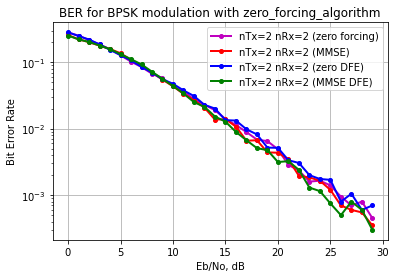

In [12]:
result_zero = Zero_Forcing()
result_mmse = MMSE()
result_zero_DFE = Zero_Forcing_SIC()
resutl_MMSE_DFE = MMSE_DFE()
print(result_zero)
print(result_mmse)
print(result_zero_DFE)
print(resutl_MMSE_DFE)
plt.figure()
plt.semilogy(eb_no_db, result_zero, 'mo-', linewidth=2, markersize=4, label='nTx=2 nRx=2 (zero forcing)')
plt.semilogy(eb_no_db, result_mmse, 'ro-', linewidth=2, markersize=4, label='nTx=2 nRx=2 (MMSE)')
plt.semilogy(eb_no_db, result_zero_DFE, 'bo-', linewidth=2, markersize=4, label='nTx=2 nRx=2 (zero DFE)')
plt.semilogy(eb_no_db, resutl_MMSE_DFE, 'go-', linewidth=2, markersize=4, label='nTx=2 nRx=2 (MMSE DFE)')
plt.grid(True)
plt.legend()
plt.xlabel('Eb/No, dB')
plt.ylabel('Bit Error Rate')
plt.title('BER for BPSK modulation with zero_forcing_algorithm')
plt.show()